# STEP 1.1 ATAC annotation
Use `ArchR` (which author used in their [paper](https://www.nature.com/articles/s41586-022-05094-1)) to annotate spatial-ATAC-seq data.
> NOTE: Please install R packages used.

In [ ]:
# install.packages("ArchR")
# install.packages("data.table")
# install.packages("Seurat")

In [2]:
library(ArchR)
library(Seurat)
library(grid)
library(tidyverse)
library(data.table)
library(stringr)

In [3]:
library(reticulate)
use_python("../../conda/bin/python")

In [4]:
addArchRThreads(threads = 24)
addArchRGenome("mm10")

inputFiles <- "../../data/spatial_ATAC/ME11_20um/GSM6043255_ME11_20um_fragments.tsv.gz"
sampleNames <- "ME11_20um"

ArrowFiles <- createArrowFiles(
  inputFiles = inputFiles,
  sampleNames = sampleNames,
  filterTSS = 0,
  filterFrags = 0,
  minFrags = 0,
  maxFrags = 1e+07,
  addTileMat = TRUE,
  addGeneScoreMat = TRUE,
  offsetPlus = 0,
  offsetMinus = 0,
  TileMatParams = list(tileSize = 5000)
)
# ArrowFiles

proj <- ArchRProject(
  ArrowFiles = ArrowFiles,
  outputDirectory = sampleNames,
  copyArrows = FALSE
)
# proj

Setting default number of Parallel threads to 24.

Setting default genome to Mm10.

filterFrags is no longer a valid input. Please use minFrags! Setting filterFrags value to minFrags!

filterTSS is no longer a valid input. Please use minTSS! Setting filterTSS value to minTSS!

Using GeneAnnotation set by addArchRGenome(Mm10)!

Using GeneAnnotation set by addArchRGenome(Mm10)!

ArchR logging to : ArchRLogs/ArchR-createArrows-18d3e818d0bdd4-Date-2022-09-26_Time-17-00-39.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

2022-09-26 17:00:39 : Batch Execution w/ safelapply!, 0 mins elapsed.

(ME11_20um : 1 of 1) Checking if completed file exists!

2022-09-26 17:00:39 : (ME11_20um : 1 of 1) Arrow Exists! Marking as completed since force = FALSE!, 0.001 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-createArrows-18d3e818d0bdd4-Date-2022-09-26_Time-17-00-39.log

Using GeneAnnotation set by addArchRGenome(Mm10)!

Using GeneAnnotation set by

In [5]:
meta.data <- as.data.frame(getCellColData(ArchRProj = proj))
meta.data %>% head()
meta.data$barcode <- str_split_fixed(str_split_fixed(meta.data %>% rownames(), "#", n=2)[, 2], "-", 2)[, 1]
anno <- read_csv("../../data/spatial_ATAC/ME11_20um/ME11_20um_spatial/tissue_positions_list.csv", col_names = FALSE)
colnames(anno) <- c("barcode", "filter", "x1", "x2", "p1", "p2")
length(intersect(anno$barcode, meta.data$barcode))
meta.data <- left_join(x = meta.data, y = anno,
                        by = c("barcode" = "barcode"))
meta.data %>% head()

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,nDiFrags,BlacklistRatio
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ME11_20um#AACGTGATCGCTGATC-1,ME11_20um,3.259,2057,12153,4328,0.05237143,1,0.8884296,22126,61441,116027,32460,0.01865083
ME11_20um#CGCTGATCAGAGTCAA-1,ME11_20um,4.318,2305,12436,5452,0.05577632,1,0.8226869,19802,61163,111481,30516,0.02445260
ME11_20um#AACGTGATCATCAAGT-1,ME11_20um,4.323,2351,12478,3766,0.06133021,1,0.8211894,18321,55858,101728,27549,0.01851014
ME11_20um#CGACTGGACTGAGCCA-1,ME11_20um,4.081,1791,9627,5814,0.05016153,1,0.8024719,17602,53238,95960,25120,0.03029387
ME11_20um#CGCTGATCACGTATCA-1,ME11_20um,5.739,3310,16089,3625,0.08492568,1,0.7429481,15268,54347,94724,25109,0.01913454
ME11_20um#CTCAATGACTGAGCCA-1,ME11_20um,3.873,1508,8383,5806,0.04471649,1,0.7837298,16290,52550,93735,24895,0.03097029


Rows: 2500 Columns: 6
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (5): X2, X3, X4, X5, X6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 2500

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,nDiFrags,BlacklistRatio,barcode,filter,x1,x2,p1,p2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ME11_20um,3.259,2057,12153,4328,0.05237143,1,0.8884296,22126,61441,116027,32460,0.01865083,AACGTGATCGCTGATC,1,8,0,593,1203
2,ME11_20um,4.318,2305,12436,5452,0.05577632,1,0.8226869,19802,61163,111481,30516,0.02445260,CGCTGATCAGAGTCAA,1,23,8,784,1117
3,ME11_20um,4.323,2351,12478,3766,0.06133021,1,0.8211894,18321,55858,101728,27549,0.01851014,AACGTGATCATCAAGT,1,7,0,580,1203
4,ME11_20um,4.081,1791,9627,5814,0.05016153,1,0.8024719,17602,53238,95960,25120,0.03029387,CGACTGGACTGAGCCA,1,43,40,1039,774
5,ME11_20um,5.739,3310,16089,3625,0.08492568,1,0.7429481,15268,54347,94724,25109,0.01913454,CGCTGATCACGTATCA,1,21,8,759,1117
6,ME11_20um,3.873,1508,8383,5806,0.04471649,1,0.7837298,16290,52550,93735,24895,0.03097029,CTCAATGACTGAGCCA,1,43,42,1039,752


In [6]:
cell_pass <- proj$cellNames[meta.data$filter == 1]
cell_pass %>% length()
proj_in_tissue <- proj[cell_pass, ]

[1] 2099

# Data normalization and dimensionality reduction 

In [71]:
proj_in_tissue <- addIterativeLSI(
  ArchRProj = proj_in_tissue,
  useMatrix = "TileMatrix",
  name = "IterativeLSI",
  iterations = 2,
  clusterParams = list(
    resolution = c(0.2),
    sampleCells = 10000,
    n.start = 10
  ),
  varFeatures = 25000,
  dimsToUse = 1:30,
  force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-18d3e872426e5d-Date-2022-10-12_Time-14-10-18.log
If there is an issue, please report to github with logFile!

2022-10-12 14:10:23 : Computing Total Across All Features, 0.074 mins elapsed.

2022-10-12 14:10:24 : Computing Top Features, 0.085 mins elapsed.

###########
2022-10-12 14:10:25 : Running LSI (1 of 2) on Top Features, 0.106 mins elapsed.
###########

2022-10-12 14:10:25 : Creating Partial Matrix, 0.106 mins elapsed.

2022-10-12 14:10:37 : Computing LSI, 0.298 mins elapsed.

2022-10-12 14:12:25 : Identifying Clusters, 2.099 mins elapsed.

2022-10-12 14:12:35 : Identified 2 Clusters, 2.272 mins elapsed.

2022-10-12 14:12:35 : Saving LSI Iteration, 2.272 mins elapsed.



2022-10-12 14:12:45 : Creating Cluster Matrix on the total Group Features, 2.437 mins elapsed.

2022-10-12 14:12:53 : Computing Variable Features, 2.575 mins elapsed.

###########
2022-10-12 14:12:53 : Running LSI (2 of 2) on Variable Features

ArchR logging to : ArchRLogs/ArchR-addClusters-18d3e845f7c49e-Date-2022-09-26_Time-17-02-33.log
If there is an issue, please report to github with logFile!

2022-09-26 17:02:33 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2099
Number of edges: 221693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6270
Number of communities: 7
Elapsed time: 0 seconds


2022-09-26 17:02:37 : Testing Outlier Clusters, 0.075 mins elapsed.

2022-09-26 17:02:37 : Assigning Cluster Names to 7 Clusters, 0.075 mins elapsed.

2022-09-26 17:02:38 : Finished addClusters, 0.076 mins elapsed.

17:02:38 UMAP embedding parameters a = 0.583 b = 1.334

17:02:38 Read 2099 rows and found 30 numeric columns

17:02:38 Using Annoy for neighbor search, n_neighbors = 30

17:02:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:02:38 Writing NN index file to temp file /tmp/Rtmpw5b12M/file18d3e818ab46b7

17:02:38 Searching Annoy index using 20 threads, search_k = 3000

17:02:38 Annoy recall = 100%

17:02:39 Commencing smooth kNN distance calibration using 20 threads
 with target n_neighbors = 30

17:02:40 Initializing from normalized Laplacian + noise (usi

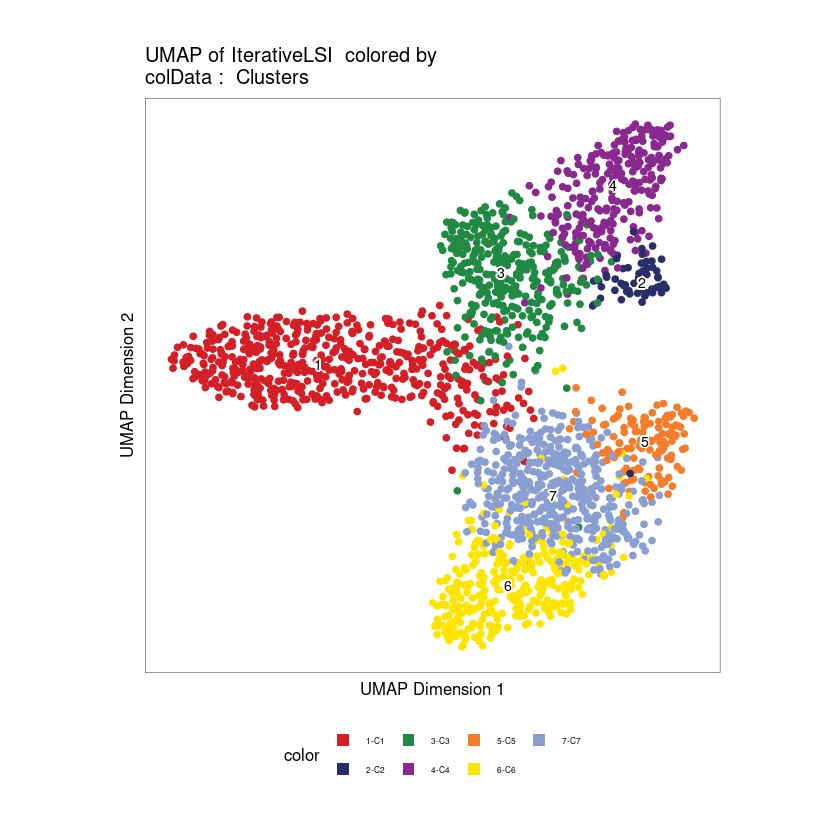

In [8]:
proj_in_tissue <- addClusters(
  input = proj_in_tissue,
  reducedDims = "IterativeLSI",
  method = "Seurat",
  name = "Clusters",
  resolution = 1,
  force = TRUE,
  verbose = TRUE
)

proj_in_tissue <- addUMAP(
  ArchRProj = proj_in_tissue,
  reducedDims = "IterativeLSI",
  name = "UMAP",
  nNeighbors = 30,
  minDist = 0.5,
  metric = "cosine",
  force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-18d3e85c24c993-Date-2022-10-14_Time-11-20-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-18d3e85c24c993-Date-2022-10-14_Time-11-20-26.log



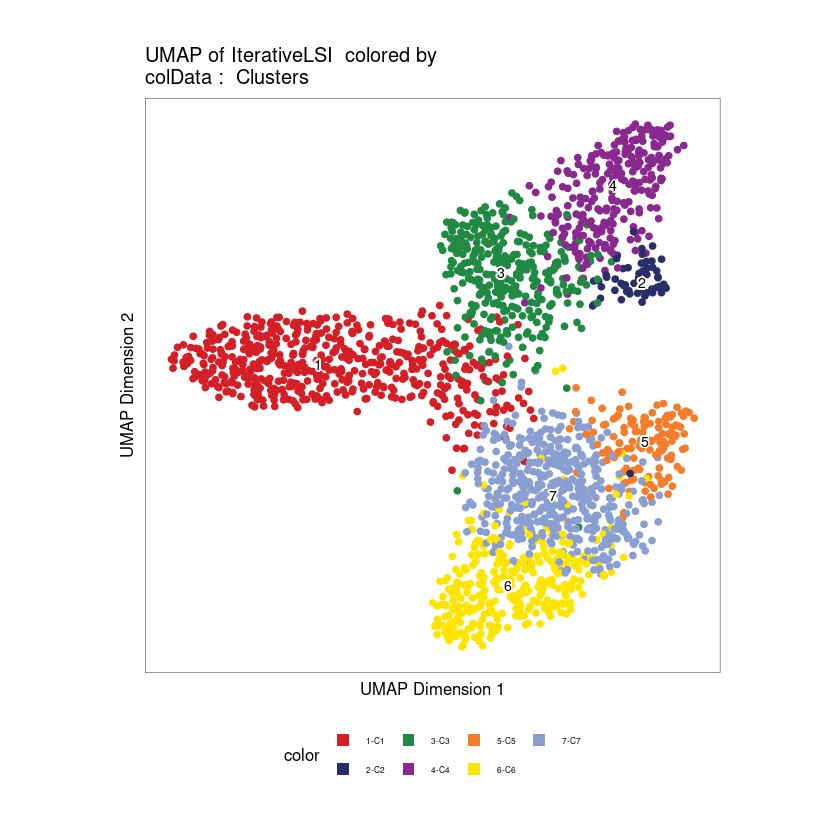

In [87]:
plotEmbedding(ArchRProj = proj_in_tissue, colorBy = "cellColData",
                name = "Clusters", embedding = "UMAP", size = 1.5)

In [9]:
proj_in_tissue <- addImputeWeights(proj_in_tissue)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-18d3e860a1f326-Date-2022-09-26_Time-17-02-50.log
If there is an issue, please report to github with logFile!

2022-09-26 17:02:50 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



# Save files and projects

In [72]:
# get and save LSI for GLUE
LSI_emb <- getReducedDims(
  ArchRProj = proj_in_tissue,
  reducedDims = "IterativeLSI",
  returnMatrix = TRUE,
  dimsToUse = NULL,
  scaleDims = NULL,
  corCutOff = 0.75
)
dim(LSI_emb)

[1] 2099  100

In [80]:
LSI_emb[1:5, 1:5] %>% as.data.frame()

,LSI1,LSI2,LSI3,LSI4,LSI5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ME11_20um#AACGTGATCGCTGATC-1,9.640382,-1.6832953,0.5412939,1.0136731,-0.020133059
ME11_20um#CGCTGATCAGAGTCAA-1,9.763341,-1.1017118,0.3892229,0.7863793,0.005766036
ME11_20um#AACGTGATCATCAAGT-1,9.681296,-1.6392218,0.3034757,0.9120193,-0.263836214
ME11_20um#CGACTGGACTGAGCCA-1,8.714631,-0.5762872,1.4098698,-0.7224795,0.597378833
ME11_20um#CGCTGATCACGTATCA-1,9.795035,-1.1211678,-0.2308905,0.6286032,-0.103721276


In [81]:
write.csv(as.data.frame(LSI_emb), file = "ArchR_LSI_embd.csv")

In [9]:
# cell metadata
meta.data <- as.data.frame(getCellColData(ArchRProj = proj_in_tissue))
head(meta.data)
meta.data <- meta.data %>% rownames_to_column("Barcodes")
fwrite(x = meta.data, file = "./meta.csv", sep = ",", col.names = TRUE)

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,nDiFrags,BlacklistRatio,Clusters
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ME11_20um#AACGTGATCGCTGATC-1,ME11_20um,3.259,2057,12153,4328,0.05237143,1,0.8884296,22126,61441,116027,32460,0.01865083,C3
ME11_20um#CGCTGATCAGAGTCAA-1,ME11_20um,4.318,2305,12436,5452,0.05577632,1,0.8226869,19802,61163,111481,30516,0.02445260,C3
ME11_20um#AACGTGATCATCAAGT-1,ME11_20um,4.323,2351,12478,3766,0.06133021,1,0.8211894,18321,55858,101728,27549,0.01851014,C3
ME11_20um#CGACTGGACTGAGCCA-1,ME11_20um,4.081,1791,9627,5814,0.05016153,1,0.8024719,17602,53238,95960,25120,0.03029387,C1
ME11_20um#CGCTGATCACGTATCA-1,ME11_20um,5.739,3310,16089,3625,0.08492568,1,0.7429481,15268,54347,94724,25109,0.01913454,C3
ME11_20um#CTCAATGACTGAGCCA-1,ME11_20um,3.873,1508,8383,5806,0.04471649,1,0.7837298,16290,52550,93735,24895,0.03097029,C1


In [10]:
saveArchRProject(ArchRProj = proj_in_tissue, outputDirectory = "Save-ME11-in_tissue", load = FALSE)

Copying ArchRProject to new outputDirectory : /rd2/user/xiacr/spatialGLUE/case/spatial_ATAC_E11_20um/Save-ME11-in_tissue

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

Dropping ImputeWeights...

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI

Saving ArchRProject...



# Get gene expr score

In [14]:
gene_score_obj <- getMatrixFromProject(proj_in_tissue,
                                        useMatrix = "GeneScoreMatrix")

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-18d3e86f467fa0-Date-2022-09-26_Time-17-04-14.log
If there is an issue, please report to github with logFile!

2022-09-26 17:04:37 : Organizing colData, 0.382 mins elapsed.

2022-09-26 17:04:37 : Organizing rowData, 0.382 mins elapsed.

2022-09-26 17:04:37 : Organizing rowRanges, 0.382 mins elapsed.

2022-09-26 17:04:37 : Organizing Assays (1 of 1), 0.382 mins elapsed.

2022-09-26 17:04:37 : Constructing SummarizedExperiment, 0.382 mins elapsed.

2022-09-26 17:04:38 : Finished Matrix Creation, 0.396 mins elapsed.



In [12]:
gene_score <- gene_score_obj@assays@data$GeneScoreMatrix %>% as.data.table()
rownames(gene_score) <- gene_score_obj@elementMetadata$name
gene_score[1:5, 1:5]
fwrite(gene_score, "./ArchR_gene_score.csv", sep = ",", row.names = T, col.names = T)

ME11_20um#AACGTGATCGCTGATC-1,ME11_20um#CGCTGATCAGAGTCAA-1,ME11_20um#AACGTGATCATCAAGT-1,ME11_20um#CGACTGGACTGAGCCA-1,ME11_20um#CGCTGATCACGTATCA-1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.135,1.392,1.233,1.565,0.772
0.142,0.480,0.224,0.594,0.412
0.433,0.441,0.563,0.156,0.368
0.341,0.955,0.328,0.465,0.106
0.320,0.369,0.213,0.265,0.428


In [13]:
impute_score_sparse <- imputeMatrix(assay(gene_score_obj), getImputeWeights(proj_in_tissue))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-imputeMatrix-3541af214bddb4-Date-2022-09-17_Time-11-24-41.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1



In [14]:
impute_score <- impute_score_sparse %>% as.data.table()
rownames(impute_score) <- gene_score_obj@elementMetadata$name
impute_score[1:5, 1:5]
fwrite(impute_score, "./ArchR_impute_score.csv", sep = ",", row.names = T, col.names = T)

ME11_20um#AACGTGATCGCTGATC-1,ME11_20um#CGCTGATCAGAGTCAA-1,ME11_20um#AACGTGATCATCAAGT-1,ME11_20um#CGACTGGACTGAGCCA-1,ME11_20um#CGCTGATCACGTATCA-1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.3157358,1.3855962,1.2313298,1.6064716,1.1573837
0.4430475,0.4662671,0.4082558,0.5487265,0.3888326
0.5044123,0.5078648,0.4926099,0.5321775,0.4854505
0.3200379,0.3282871,0.3113027,0.3547655,0.3023086
0.2248290,0.2271280,0.2197597,0.2337570,0.2157440


# Get peaks

In [ ]:
proj_in_tissue <- addGroupCoverages(ArchRProj = proj_in_tissue, groupBy = "Clusters")

In [95]:
proj_in_tissue <- addReproduciblePeakSet(
  ArchRProj = proj_in_tissue,
  groupBy = "Clusters",
  pathToMacs2 = findMacs2(),
  force = TRUE
)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-18d3e8628149d3-Date-2022-10-14_Time-11-39-58.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2022-10-14 11:39:58 : Peak Calling Parameters!, 0.002 mins elapsed.



   Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
C1    C1    530        530           2   40  490   150000
C2    C2     56         54           2   40   40    27000
C3    C3    343        343           2   40  303   150000
C4    C4    259        259           2   40  219   129500
C5    C5    132        132           2   40   92    66000
C6    C6    311        311           2   40  271   150000
C7    C7    468        468           2   40  428   150000


2022-10-14 11:39:58 : Batching Peak Calls!, 0.002 mins elapsed.

2022-10-14 11:39:58 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-10-14 11:42:44 : Identifying Reproducible Peaks!, 2.775 mins elapsed.

2022-10-14 11:42:50 : Creating Union Peak Set!, 2.865 mins elapsed.

Converged after 4 iterations!

Plotting Ggplot!

2022-10-14 11:42:54 : Finished Creating Union Peak Set (44794)!, 2.945 mins elapsed.



In [96]:
proj_in_tissue <- addPeakMatrix(proj_in_tissue)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-18d3e82370094f-Date-2022-10-14_Time-11-49-03.log
If there is an issue, please report to github with logFile!

2022-10-14 11:49:03 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-10-14 11:49:03 : Adding ME11_20um to PeakMatrix for Chr (1 of 20)!, 0.002 mins elapsed.

2022-10-14 11:49:09 : Adding ME11_20um to PeakMatrix for Chr (2 of 20)!, 0.093 mins elapsed.

2022-10-14 11:49:14 : Adding ME11_20um to PeakMatrix for Chr (3 of 20)!, 0.176 mins elapsed.

2022-10-14 11:49:18 : Adding ME11_20um to PeakMatrix for Chr (4 of 20)!, 0.24 mins elapsed.

2022-10-14 11:49:22 : Adding ME11_20um to PeakMatrix for Chr (5 of 20)!, 0.306 mins elapsed.

2022-10-14 11:49:26 : Adding ME11_20um to PeakMatrix for Chr (6 of 20)!, 0.37 mins elapsed.

2022-10-14 11:49:29 : Adding ME11_20um to PeakMatrix for Chr (7 of 20)!, 0.427 mins elapsed.

2022-10-14 11:49:33 : Adding ME11_20um to PeakMatrix for Chr (8 of 20)!, 0.491 mins elapsed.

2022-10-14 11:49:36 

In [97]:
peak_mat <- getMatrixFromProject(
  ArchRProj = proj_in_tissue,
  useMatrix = "PeakMatrix",
  useSeqnames = NULL,
  verbose = TRUE,
  binarize = FALSE,
  threads = getArchRThreads(),
  logFile = createLogFile("getMatrixFromProject")
)

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-18d3e82b0f437a-Date-2022-10-14_Time-11-51-22.log
If there is an issue, please report to github with logFile!

2022-10-14 11:51:25 : Organizing colData, 0.047 mins elapsed.

2022-10-14 11:51:25 : Organizing rowData, 0.047 mins elapsed.

2022-10-14 11:51:25 : Organizing rowRanges, 0.047 mins elapsed.

2022-10-14 11:51:25 : Organizing Assays (1 of 1), 0.047 mins elapsed.

2022-10-14 11:51:25 : Constructing SummarizedExperiment, 0.047 mins elapsed.

2022-10-14 11:51:26 : Finished Matrix Creation, 0.07 mins elapsed.



In [128]:
var <- peak_mat@rowRanges %>% as.data.frame()
colnames(var)[1:3] <- c("chrom", "chromStart", "chromEnd")

In [131]:
dim(var)

[1] 44794     6

In [132]:
fwrite(var, file = "var.csv")

In [113]:
fwrite(as.data.table(peak_mat@assays@data[[1]]), file = "peaks.csv")

# Vis gene score

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-18d3e854dfea4d-Date-2022-09-26_Time-17-05-33.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-09-26 17:05:33 : 

1 


Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-18d3e854dfea4d-Date-2022-09-26_Time-17-05-33.log



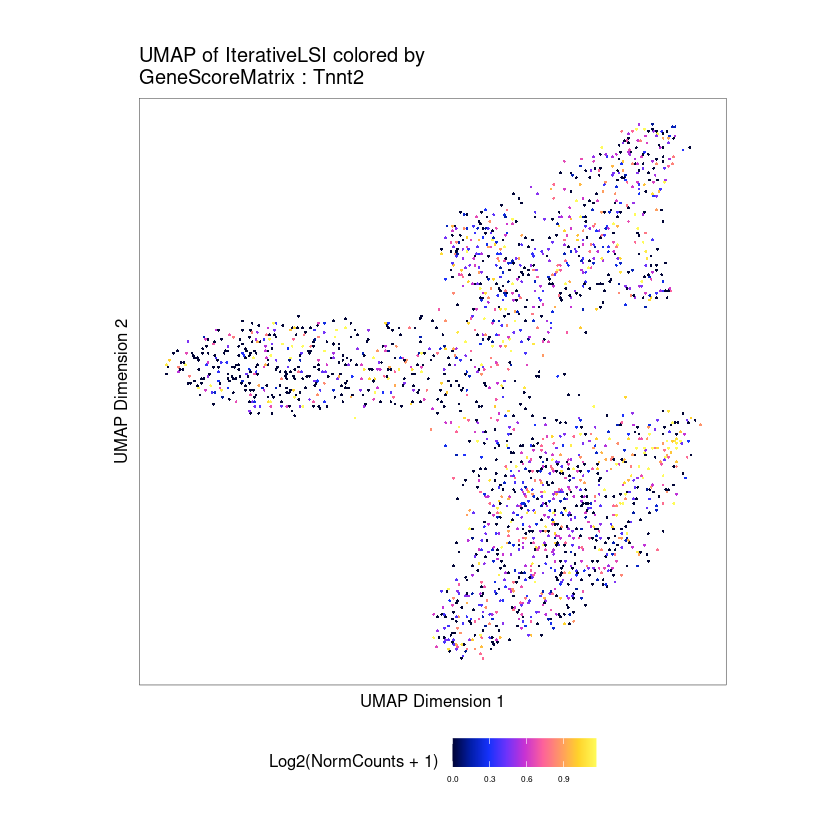

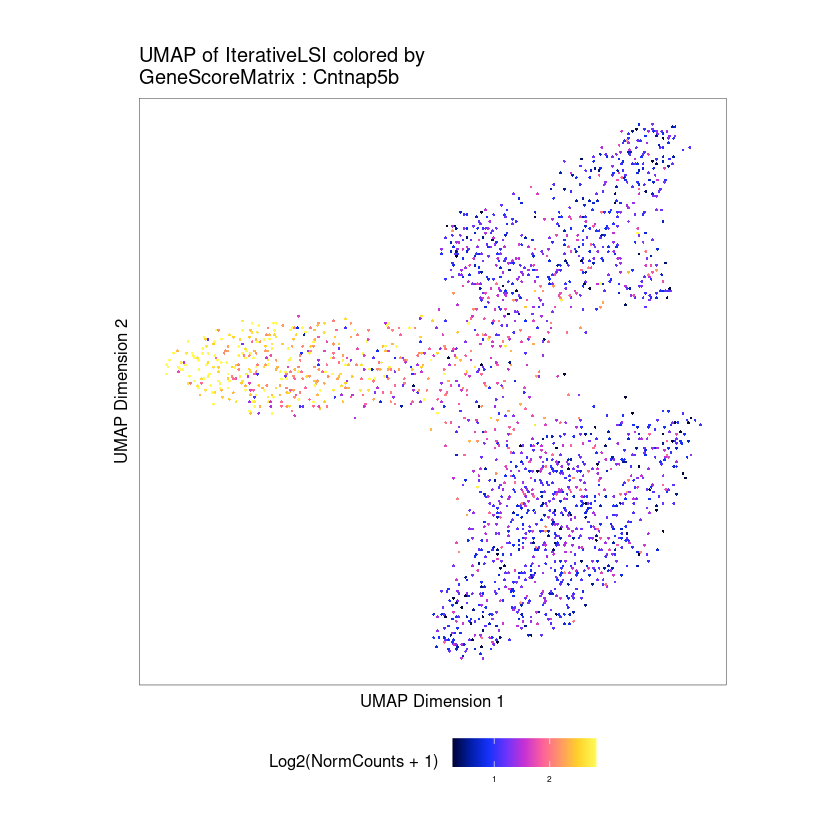

$Tnnt2

$Cntnap5b

$Dnm3os

$Sox1ot


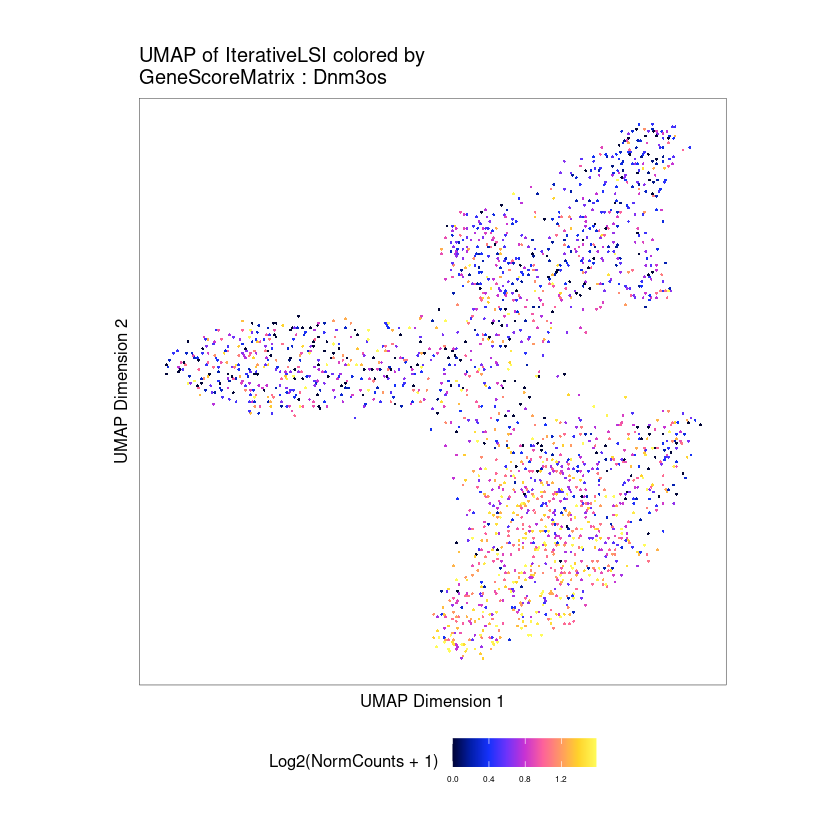

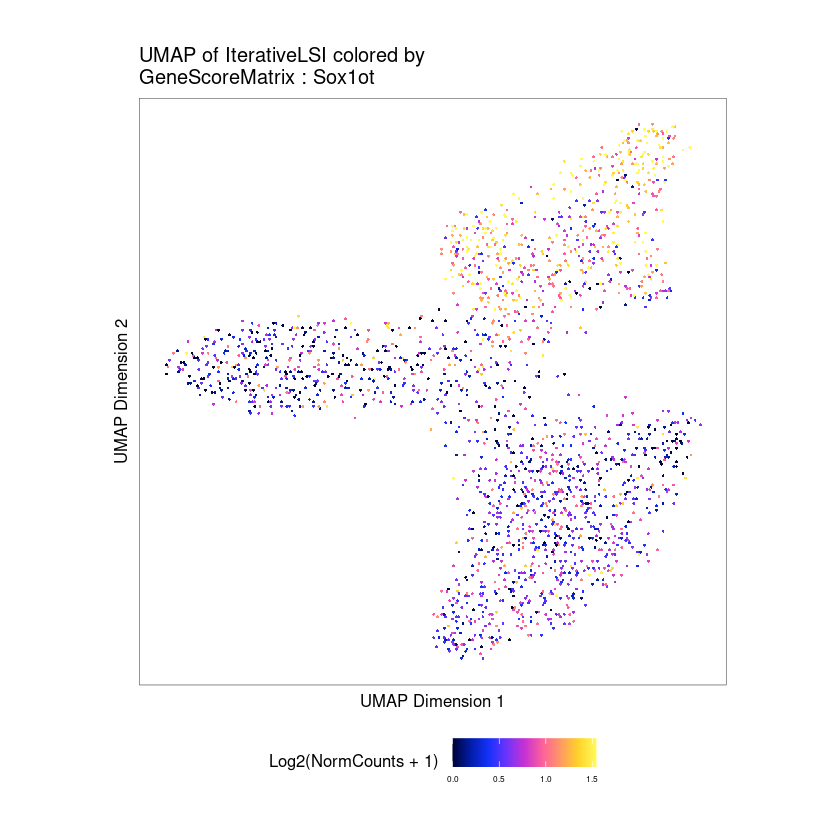

In [18]:
marker_gene_list <- c("Tnnt2", "Cntnap5b", "Dnm3os", "Sox1ot")
plotEmbedding(
    ArchRProj = proj_in_tissue,
    colorBy = "GeneScoreMatrix",
    name = marker_gene_list,
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL,
    size = 0.6
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-18d3e81ac587ca-Date-2022-09-26_Time-17-05-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-09-26 17:05:43 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-18d3e81ac587ca-Date-2022-09-26_Time-17-05-43.log



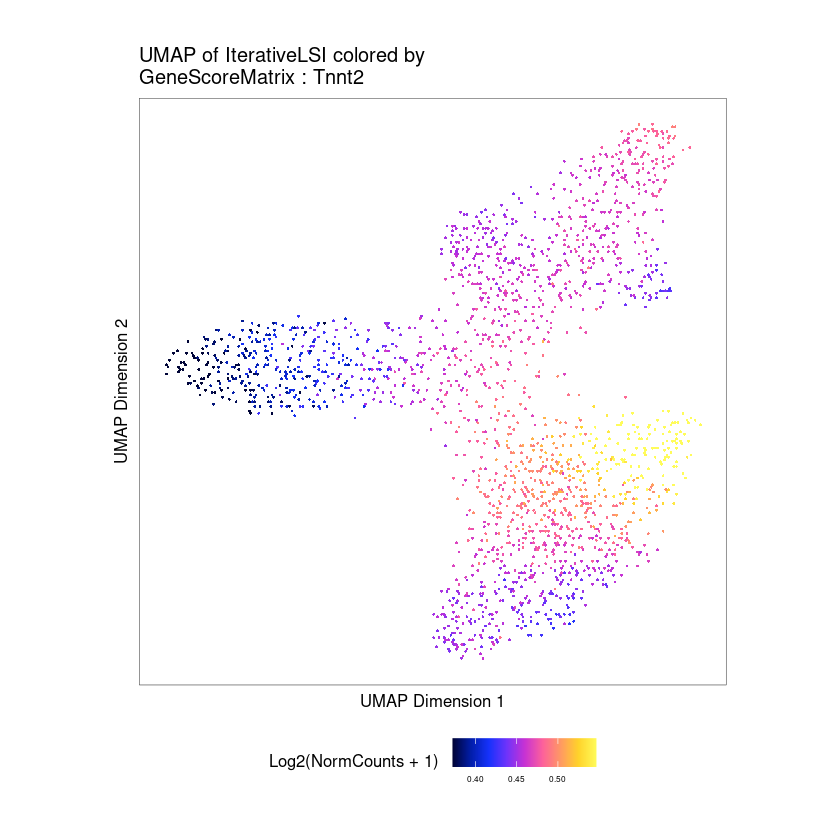

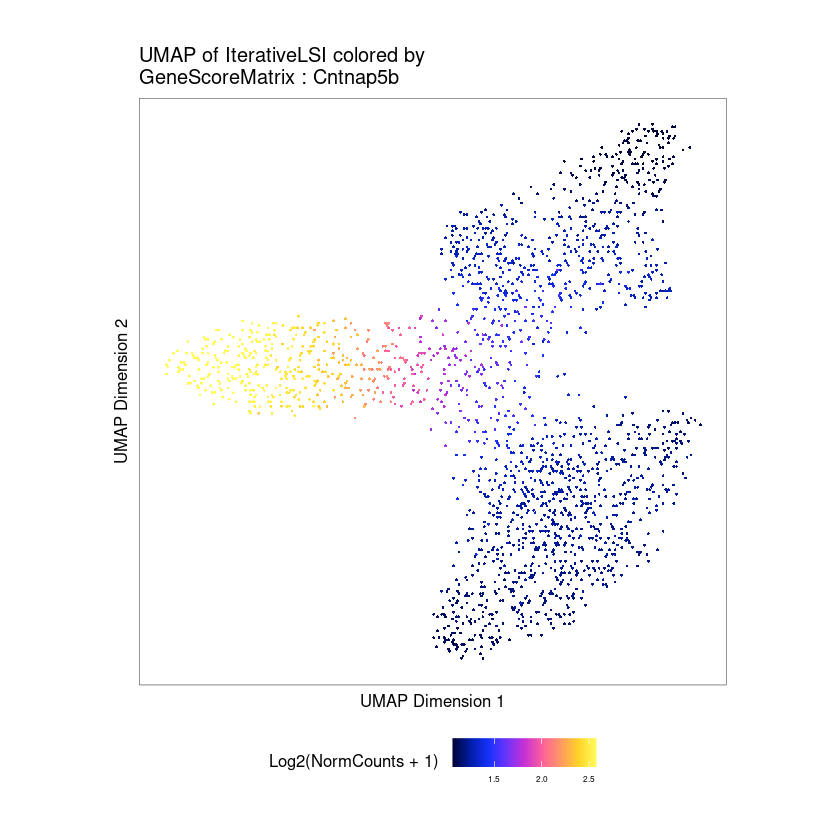

$Tnnt2

$Cntnap5b

$Dnm3os

$Sox1ot


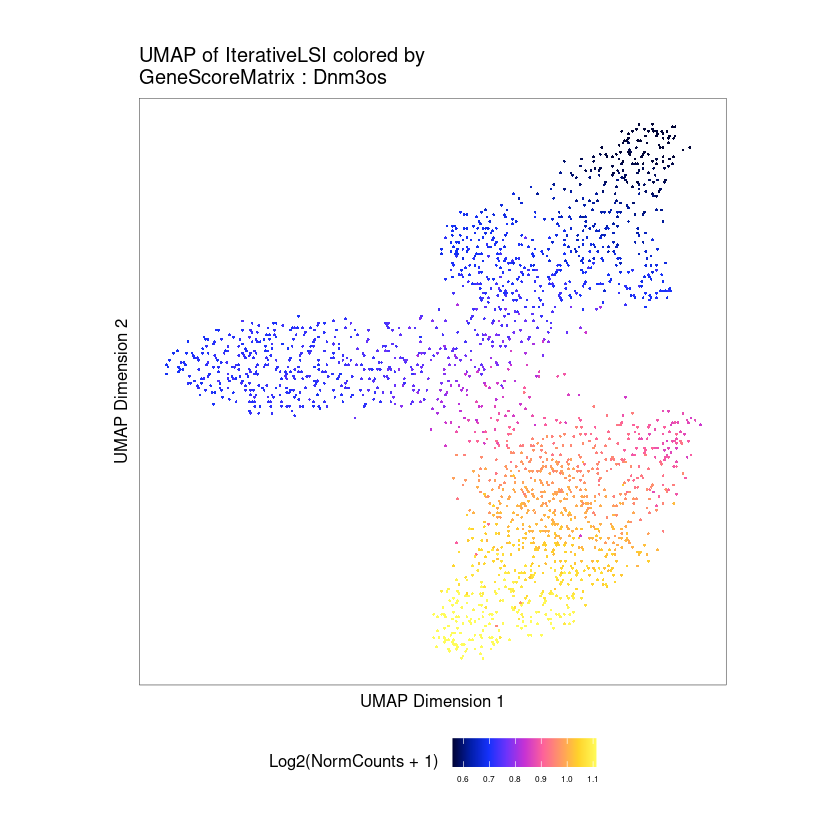

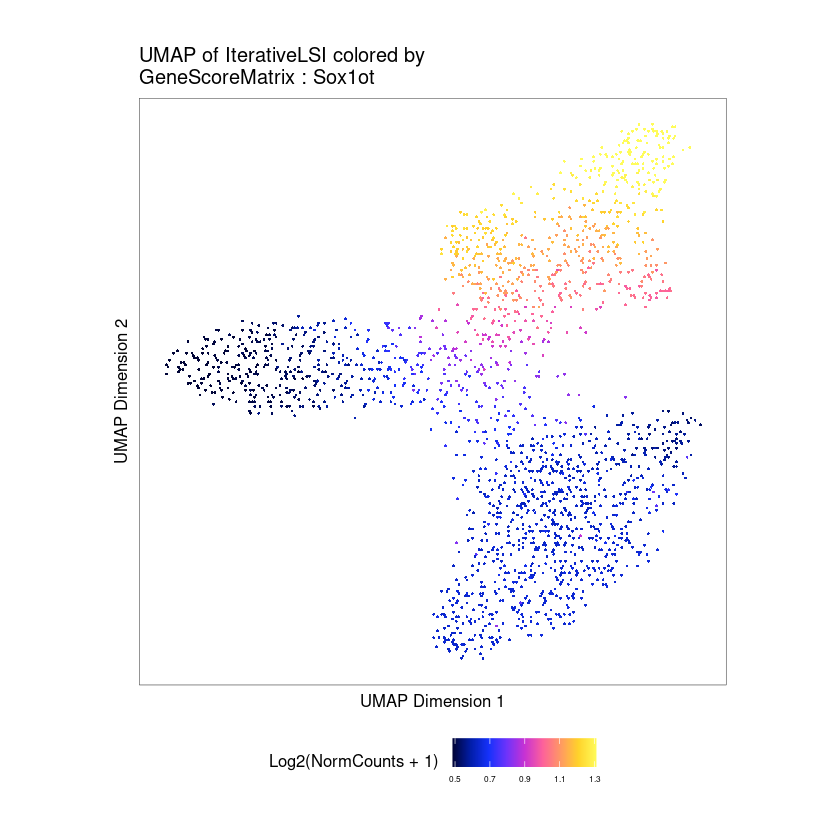

In [19]:
plotEmbedding(
    ArchRProj = proj_in_tissue,
    colorBy = "GeneScoreMatrix",
    name = marker_gene_list,
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj_in_tissue),
    size = 0.3
)

# Reload and validate `SLAT` annotation

In [22]:
slat_anno <- read_csv("./SLAT_anno.csv")

New names:
• `` -> `...1`
Rows: 2099 Columns: 27
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): barcode, Barcodes, Sample, Clusters, Barcodes_cut, domain, target_...
dbl (20): ...1, suffix, x1, x2, p1, p2, TSSEnrichment, ReadsInTSS, ReadsInPr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
proj_in_tissue@cellColData["barcode"] <- rownames(proj_in_tissue@cellColData)
proj_in_tissue@cellColData %>% head(2)

DataFrame with 2 rows and 15 columns
                                Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                                 <Rle>       <array>    <array>         <array>
ME11_20um#AACGTGATCGCTGATC-1 ME11_20um         3.259       2057           12153
ME11_20um#CGCTGATCAGAGTCAA-1 ME11_20um         4.318       2305           12436
                             ReadsInBlacklist      PromoterRatio  PassQC
                                      <array>            <array> <array>
ME11_20um#AACGTGATCGCTGATC-1             4328 0.0523714307876615       1
ME11_20um#CGCTGATCAGAGTCAA-1             5452 0.0557763206286273       1
                               NucleosomeRatio nMultiFrags nMonoFrags  nFrags
                                       <array>     <array>    <array> <array>
ME11_20um#AACGTGATCGCTGATC-1 0.888429550300288       22126      61441  116027
ME11_20um#CGCTGATCAGAGTCAA-1 0.822686918561876       19802      61163  111481
                             nDiFrags  

In [24]:
tmp <- proj_in_tissue@cellColData %>% as.tibble() %>% left_join(y = slat_anno, by = c("barcode" = "Barcodes"))
proj_in_tissue@cellColData["target_celltype"] <- tmp$target_celltype

In [25]:
proj_in_tissue@cellColData

DataFrame with 2099 rows and 16 columns
                                Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                                 <Rle>       <array>    <array>         <array>
ME11_20um#AACGTGATCGCTGATC-1 ME11_20um         3.259       2057           12153
ME11_20um#CGCTGATCAGAGTCAA-1 ME11_20um         4.318       2305           12436
ME11_20um#AACGTGATCATCAAGT-1 ME11_20um         4.323       2351           12478
ME11_20um#CGACTGGACTGAGCCA-1 ME11_20um         4.081       1791            9627
ME11_20um#CGCTGATCACGTATCA-1 ME11_20um         5.739       3310           16089
...                                ...           ...        ...             ...
ME11_20um#CACTTCGAGAGCTGAA-1 ME11_20um          3.87         86             427
ME11_20um#GATAGACACATACCAA-1 ME11_20um         5.012         81             423
ME11_20um#AACGCTTAGAGCTGAA-1 ME11_20um         4.013         77             399
ME11_20um#CAGCGTTACTCAATGA-1 ME11_20um         4.152         65             403


In [47]:
pp <- plotBrowserTrack(
    ArchRProj = proj_in_tissue,
    groupBy = "target_celltype",
    geneSymbol = c("Pou3f2", "Nova2", "Ubtf", "Syt8", "Ascl1", "Tnnt2"),
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-18d3e876b75ed7-Date-2022-09-26_Time-17-20-16.log
If there is an issue, please report to github with logFile!

2022-09-26 17:20:16 : Validating Region, 0.001 mins elapsed.



GRanges object with 6 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr4   22482095-22488366      - |       18992      Pou3f2
  [2]     chr7   18925888-18965319      + |      384569       Nova2
  [3]    chr11 102304563-102319096      - |       21429        Ubtf
  [4]     chr7 142434977-142440396      + |       55925        Syt8
  [5]    chr10   87491041-87493660      - |       17172       Ascl1
  [6]     chr1 135836334-135852268      + |       21956       Tnnt2
  -------
  seqinfo: 21 sequences from mm10 genome


2022-09-26 17:20:16 : Adding Bulk Tracks (1 of 6), 0.003 mins elapsed.

Getting Region From Arrow Files 1 of 1

2022-09-26 17:20:17 : Adding Gene Tracks (1 of 6), 0.02 mins elapsed.

2022-09-26 17:20:17 : Plotting, 0.023 mins elapsed.

2022-09-26 17:20:18 : Adding Bulk Tracks (2 of 6), 0.046 mins elapsed.

Getting Region From Arrow Files 1 of 1

2022-09-26 17:20:19 : Adding Gene Tracks (2 of 6), 0.061 mins elapsed.

2022-09-26 17:20:19 : Plotting, 0.064 mins elapsed.

2022-09-26 17:20:21 : Adding Bulk Tracks (3 of 6), 0.091 mins elapsed.

Getting Region From Arrow Files 1 of 1

2022-09-26 17:20:22 : Adding Gene Tracks (3 of 6), 0.106 mins elapsed.

2022-09-26 17:20:22 : Plotting, 0.109 mins elapsed.

2022-09-26 17:20:24 : Adding Bulk Tracks (4 of 6), 0.138 mins elapsed.

Getting Region From Arrow Files 1 of 1

2022-09-26 17:20:25 : Adding Gene Tracks (4 of 6), 0.153 mins elapsed.

2022-09-26 17:20:25 : Plotting, 0.156 mins elapsed.

2022-09-26 17:20:27 : Adding Bulk Tracks (5 of 6), 0.

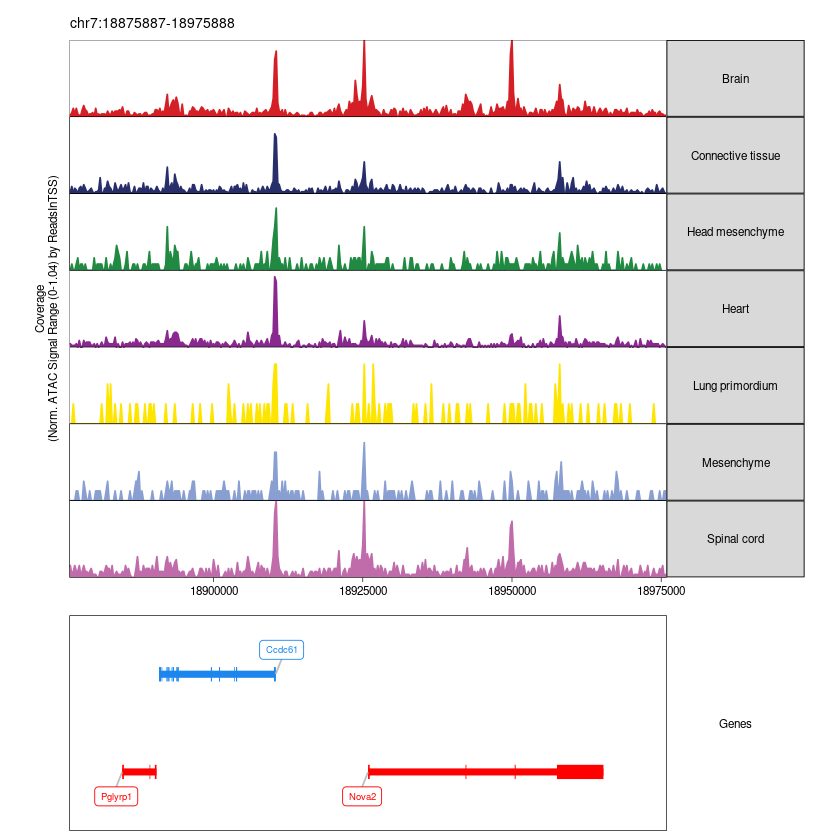

In [50]:
grid::grid.newpage()
grid::grid.draw(pp$Nova2)